In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
both_df = pd.read_csv('./Nasa-Tlx - Both.csv')
sound_df = pd.read_csv('./Nasa-Tlx - Sound.csv')
visual_df = pd.read_csv('./Nasa-Tlx - Visual.csv')
print(sound_df)

   ID  Mental Demand  Physical Demand  Temporal Demand  Performance  Effort  \
0   1            340                0              425           60     150   
1   2            140               75               30           15      75   
2   3            225                0              100          150     350   
3   4            320               60              375          270      70   
4   5            240               10                0          200     135   
5   6            375                0              240          280      65   
6   7            300                0              100          105     240   

   Frustration  Weighted Rating  
0           15            66.00  
1           15            23.33  
2          180            67.00  
3            0            73.00  
4           30            41.00  
5          150            74.00  
6           25            51.33  


# Processing Both Condition

In [3]:
both_df.describe()

,ID,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Weighted Rating
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,285.000000,25.000000,167.857143,155.714286,142.142857,65.000000,56.047143
std,2.160247,92.870878,50.744458,154.807869,111.184103,65.246784,60.896086,15.784439
min,1.000000,105.000000,0.000000,0.000000,30.000000,70.000000,0.000000,35.330000
25%,2.500000,270.000000,0.000000,55.000000,57.500000,97.500000,22.500000,42.835000
50%,4.000000,280.000000,0.000000,120.000000,175.000000,135.000000,50.000000,60.000000
75%,5.500000,335.000000,20.000000,272.500000,225.000000,167.500000,95.000000,67.000000
max,7.000000,400.000000,135.000000,400.000000,320.000000,260.000000,170.000000,77.330000


# Processing the Visual Condition

In [4]:
visual_df.describe()

,ID,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Weighted Rating
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,265.000000,12.857143,165.000000,162.857143,179.285714,62.142857,56.428571
std,2.160247,87.891979,20.383233,149.303941,100.077351,87.484693,57.144345,7.913220
min,1.000000,105.000000,0.000000,0.000000,70.000000,80.000000,0.000000,45.000000
25%,2.500000,245.000000,0.000000,90.000000,75.000000,115.000000,25.000000,51.000000
50%,4.000000,280.000000,0.000000,105.000000,120.000000,180.000000,50.000000,56.000000
75%,5.500000,290.000000,22.500000,235.000000,250.000000,220.000000,92.500000,63.000000
max,7.000000,400.000000,45.000000,400.000000,300.000000,325.000000,150.000000,66.000000


# Processing the Sound Condition


In [5]:
sound_df.describe()

,ID,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Weighted Rating
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,277.142857,20.714286,181.428571,154.285714,155.000000,59.285714,56.522857
std,2.160247,80.408185,32.458765,167.995890,101.670570,105.987421,73.338744,18.913065
min,1.000000,140.000000,0.000000,0.000000,15.000000,65.000000,0.000000,23.330000
25%,2.500000,232.500000,0.000000,65.000000,82.500000,72.500000,15.000000,46.165000
50%,4.000000,300.000000,0.000000,100.000000,150.000000,135.000000,25.000000,66.000000
75%,5.500000,330.000000,35.000000,307.500000,235.000000,195.000000,90.000000,70.000000
max,7.000000,375.000000,75.000000,425.000000,280.000000,350.000000,180.000000,74.000000


# STATS!!

In [6]:
both_wr = both_df['Weighted Rating']
sound_wr = sound_df['Weighted Rating']
visual_wr = visual_df['Weighted Rating']

wr_df = pd.DataFrame({'both': both_wr, 'sound': sound_wr, 'visual': visual_wr})
print()

    both  sound  visual
0  60.00  66.00      61
1  42.67  23.33      56
2  35.33  67.00      51
3  69.00  73.00      66
4  43.00  41.00      51
5  77.33  74.00      65
6  65.00  51.33      45


In [13]:
    results = sm.stats.anova_oneway([sound_wr, both_wr, visual_wr], use_var="equal", welch_correction=True)
    
    print(results)

statistic = 0.001990204997139402
pvalue = 0.9980119937286688
df = (2.0, 18.0)
df_num = 2.0
df_denom = 18.0
nobs_t = 21.0
n_groups = 3
means = [56.52285714 56.04714286 56.42857143]
nobs = [7. 7. 7.]
vars_ = [357.70402381 249.14852381  62.61904762]
use_var = equal
welch_correction = True
tuple = (0.001990204997139402, 0.9980119937286688)


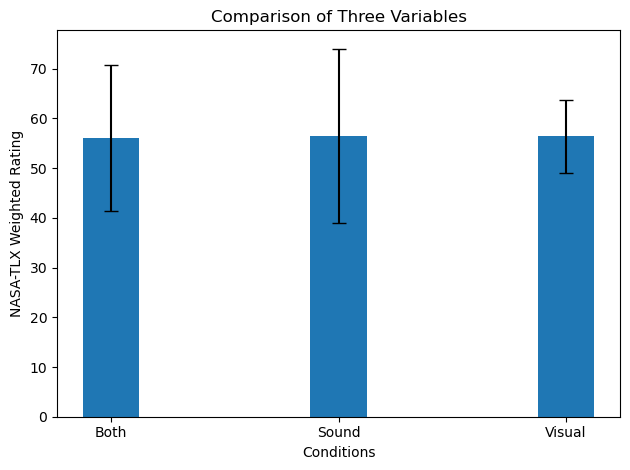

In [24]:
# Data for the three variables
x = np.arange(3)  # x-axis positions of the bars
both = [60.00, 42.67, 35.33, 69.00, 43.00, 77.33, 65.00]  # Values for variable 1
sound = [66.00, 23.33, 67.00, 73.00, 41.00, 74.00, 51.33]  # Values for variable 2
visual = [61, 56, 51, 66, 51, 65, 45]  # Values for variable 3

# Calculate the means and standard deviations for each variable
mean1 = np.mean(both)
mean2 = np.mean(sound)
mean3 = np.mean(visual)
error1 = np.std(both)
error2 = np.std(sound)
error3 = np.std(visual)

# Width of the bars
bar_width = 0.25

# Create the bar graph with error bars
plt.bar(x, [mean1, mean2, mean3], width=bar_width,
        yerr=[error1, error2, error3], capsize=5)

# Customize the plot
plt.xlabel('Conditions')
plt.ylabel('NASA-TLX Weighted Rating')
plt.title('Comparison of Three Variables')
plt.xticks(x, ['Both', 'Sound', 'Visual'])

# Display the plot
plt.tight_layout()
plt.show()


In [25]:
both_md = both_df['Mental Demand']
sound_md = sound_df['Mental Demand']
visual_md = visual_df['Mental Demand']

results = sm.stats.anova_oneway([sound_md, both_md, visual_md], use_var="equal", welch_correction=True)
    
print(results)

statistic = 0.09345160448734677
pvalue = 0.9112210559292159
df = (2.0, 18.0)
df_num = 2.0
df_denom = 18.0
nobs_t = 21.0
n_groups = 3
means = [277.14285714 285.         265.        ]
nobs = [7. 7. 7.]
vars_ = [6465.47619048 8625.         7725.        ]
use_var = equal
welch_correction = True
tuple = (0.09345160448734677, 0.9112210559292159)


In [26]:
both_td = both_df['Temporal Demand']
sound_td = sound_df['Temporal Demand']
visual_td = visual_df['Temporal Demand']

results = sm.stats.anova_oneway([sound_td, both_td, visual_td], use_var="equal", welch_correction=True)
    
print(results)

statistic = 0.02172210411904796
pvalue = 0.9785377314937569
df = (2.0, 18.0)
df_num = 2.0
df_denom = 18.0
nobs_t = 21.0
n_groups = 3
means = [181.42857143 167.85714286 165.        ]
nobs = [7. 7. 7.]
vars_ = [28222.61904762 23965.47619048 22291.66666667]
use_var = equal
welch_correction = True
tuple = (0.02172210411904796, 0.9785377314937569)


In [27]:
both_per = both_df['Performance']
sound_per = sound_df['Performance']
visual_per = visual_df['Performance']

results = sm.stats.anova_oneway([sound_per, both_per, visual_per], use_var="equal", welch_correction=True)
    
print(results)

statistic = 0.013537117903930158
pvalue = 0.986564130672796
df = (2.0, 18.0)
df_num = 2.0
df_denom = 18.0
nobs_t = 21.0
n_groups = 3
means = [154.28571429 155.71428571 162.85714286]
nobs = [7. 7. 7.]
vars_ = [10336.9047619  12361.9047619  10015.47619048]
use_var = equal
welch_correction = True
tuple = (0.013537117903930158, 0.986564130672796)


In [28]:
both_ef = both_df['Effort']
sound_ef = sound_df['Effort']
visual_ef = visual_df['Effort']

results = sm.stats.anova_oneway([sound_ef, both_ef, visual_ef], use_var="equal", welch_correction=True)
    
print(results)

statistic = 0.3228229000565813
pvalue = 0.7282083869365982
df = (2.0, 18.0)
df_num = 2.0
df_denom = 18.0
nobs_t = 21.0
n_groups = 3
means = [155.         142.14285714 179.28571429]
nobs = [7. 7. 7.]
vars_ = [11233.33333333  4257.14285714  7653.57142857]
use_var = equal
welch_correction = True
tuple = (0.3228229000565813, 0.7282083869365982)


In [29]:
both_fr = both_df['Frustration']
sound_fr = sound_df['Frustration']
visual_fr = visual_df['Frustration']

results = sm.stats.anova_oneway([sound_fr, both_fr, visual_fr], use_var="equal", welch_correction=True)
    
print(results)

statistic = 0.013878180416345417
pvalue = 0.9862282195351812
df = (2.0, 18.0)
df_num = 2.0
df_denom = 18.0
nobs_t = 21.0
n_groups = 3
means = [59.28571429 65.         62.14285714]
nobs = [7. 7. 7.]
vars_ = [5378.57142857 3708.33333333 3265.47619048]
use_var = equal
welch_correction = True
tuple = (0.013878180416345417, 0.9862282195351812)
